In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import sklearn as sk
import sklearn.gaussian_process as gp
from datetime import timedelta as dt

In [248]:
df = pd.read_csv('sotonmet.txt')

Defining variables by indexing columns from DataFrame

In [10]:
t = df['Reading Date and Time (ISO)'] #time
y = df['Tide height (m)']   #Tide height reading
y_true = df['True tide height (m)'] #Ground truth tide heights

Plot of Tide Height (m) against DateTime (ISO)

In [38]:
# Convert t's elements from string to DateTime objects
t=t.apply(datetime.datetime.fromisoformat)

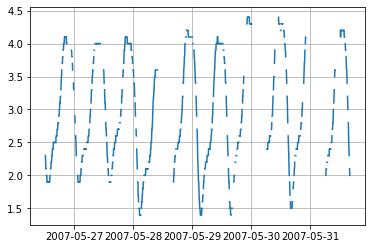

In [45]:
plt.plot(t,y)
plt.grid()

Tide Height displays periodicity as can be seen in plot above.

Start with Expo

In [249]:
df['Reading Date and Time (ISO)']=df['Reading Date and Time (ISO)'].apply(datetime.datetime.fromisoformat)

In [250]:
df['Time'] = np.nan
df['Time'] = (df['Reading Date and Time (ISO)']-df['Reading Date and Time (ISO)'].iloc[0])
df['Time']=df['Time'].dt.total_seconds()

In [251]:
df_training=df.drop(df[df['Tide height (m)'].isnull()].index)
df_missing = df[df['Tide height (m)'].isnull()]

In [272]:
X = df_training[['Tide height (m)','Time']].to_numpy()
X_missing = df_missing['Time'].to_numpy()
X_GT=df_missing['True tide height (m)'].to_numpy()

In [279]:
x=X[:,0].reshape(-1,1)
t = X[:,1].reshape(-1,1)
X_GT = X_GT.reshape(-1,1)

In [254]:
t2=X_missing.reshape(-1,1)


In [268]:
RBF=gp.kernels.RBF(length_scale=1.9) +WhiteKernel()

In [269]:
gpr=gp.GaussianProcessRegressor(normalize_y=False,kernel=RBF,n_restarts_optimizer=9)
gpr.fit(t,x)

GaussianProcessRegressor(kernel=RBF(length_scale=1.9) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=9)

In [270]:
answer=gpr.predict(t2)

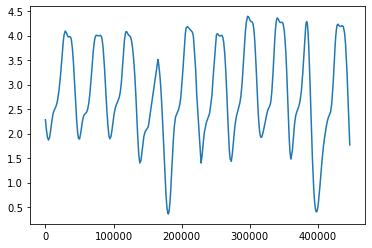

In [271]:
plt.plot(t2,answer)


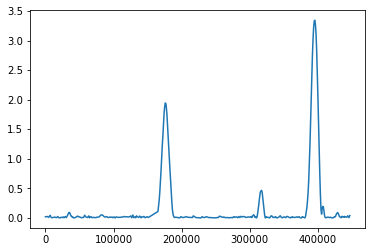

In [281]:
plt.plot(t2,abs(answer-X_GT))

/Users/terencetan/opt/anaconda3/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:402: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


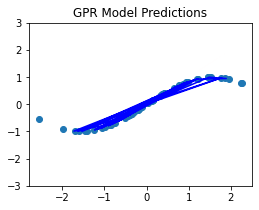

In [214]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, DotProduct, RBF
import matplotlib.pyplot as plt
import numpy as np

# Random seeds
np.random.seed(seed=0)  # Set seed for NumPy
random_state = 0

# Generate features, and take norm for use with target
x = np.random.normal(loc=0, scale=1, size=(50, 1))
y = np.sin(x)

# Create kernel and define GPR
kernel = RBF() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=random_state)

# Fit GPR model
gpr.fit(x, y)

# Create test data
x_test = np.random.normal(loc=0, scale=1, size=(50, 1))
y_test = np.sin(x_test)
 
# Predict mean
y_hat, y_sigma = gpr.predict(x_test, return_std=True)

# Initialize plot
f, ax = plt.subplots(1, 1, figsize=(4, 3))

# Squeeze data
x = np.squeeze(x)
y = np.squeeze(y)
x_test = np.squeeze(x_test)
y_test = np.squeeze(y_test)

# Plot the training data
ax.scatter(x, y)

# Plot predictive means as blue line
ax.plot(x_test, y_hat, 'b')

# Shade between the lower and upper confidence bounds
lower = x_test - y_sigma
upper = x_test + y_sigma
ax.fill_between(x_test, lower, upper, alpha=0.5)
ax.set_ylim([-3, 3])
plt.title("GPR Model Predictions")
plt.show()

In [222]:
y_true

0       2.30
1       2.24
2       2.19
3       2.14
4       2.09
        ... 
1253    2.19
1254    2.08
1255    1.98
1256    1.90
1257    1.81
Name: True tide height (m), Length: 1258, dtype: float64